In [1]:
from LHEImport.LHEImport2 import read_lhe, tohdf5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vector
# plt styles
plt.style.use(["science", "grid", "high-contrast"])
plt.rcParams.update({"font.family":"serif", "font.size":20, "figure.figsize":[12,8]})


In [35]:
data = read_lhe('event_files/lhe/ttZ_events.lhe')
data2 = read_lhe('event_files/lhe/ttZ_decayed.lhe')
tohdf5(data, 'event_files/hdf5/ttZ', key='undecayed_limited', limit_events=True)
tohdf5(data2, 'event_files/hdf5/ttZ', key='decayed_limited', limit_events=True)
# data3 = read_lhe('event_files/lhe/ttZ_events.lhe')
# tohdf5(data3,'event_files/hdf5/ttZ_weighttest', key='weights_unlimited', limit_events=False)

/home/craig/.local/lib/python3.9/site-packages/pandas/core/generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['event_info', 'particles', 'weights'], dtype='object')]

  pytables.to_hdf(


In [ ]:
# tohdf5(data, 'ttz_events_newimport', key='limited', limit_events=True)

In [36]:
df = pd.read_hdf('event_files/hdf5/ttZ.h5', 'undecayed_limited')
# df = pd.read_hdf('event_files/hdf5/ttZ_weighttest.h5', 'weights_unlimited')

In [37]:
def deltaphi_tops(particles):
    tops=[]
    for p in particles:
        if p.id==6 or p.id==-6:
            tops.append(p)
    return tops[0].fourvec.deltaphi(tops[1].fourvec)
    

def ptot2(particles):
    fourvecs=vector.obj(px=0, py=0, pz=0, E=0)
    for p in particles: 
        fourvecs += p.fourvec
    return fourvecs.pt


df['delta_phi'] = df.apply(lambda r: deltaphi_tops(r['particles']), axis=1)
df['ptotal'] = df.apply(lambda r: ptot2(r['particles']), axis=1)
df.head()

,event_info,particles,weights,delta_phi,ptotal
0,<LHEImport.LHEImport2.LHEEventInfo object at 0...,"[Particle, PDGID21, Particle, PDGID21, Particl...","{'1': 0.75973116, '2': 0.69013106, '3': 0.6053...",-2.993434,2.402081e-09
1,<LHEImport.LHEImport2.LHEEventInfo object at 0...,"[Particle, PDGID21, Particle, PDGID21, Particl...","{'1': 0.78643564, '2': 0.60313926, '3': 0.5158...",1.588332,1.140168e-09
2,<LHEImport.LHEImport2.LHEEventInfo object at 0...,"[Particle, PDGID21, Particle, PDGID21, Particl...","{'1': 0.82235279, '2': 0.55679957, '3': 0.5001...",-2.195482,1.214956e-09
3,<LHEImport.LHEImport2.LHEEventInfo object at 0...,"[Particle, PDGID21, Particle, PDGID21, Particl...","{'1': 0.82112082, '2': 0.5414364, '3': 0.50761...",3.060704,2.000021e-09
4,<LHEImport.LHEImport2.LHEEventInfo object at 0...,"[Particle, PDGID21, Particle, PDGID21, Particl...","{'1': 0.78409382, '2': 0.62431271, '3': 0.5986...",-3.060316,1.000004e-09


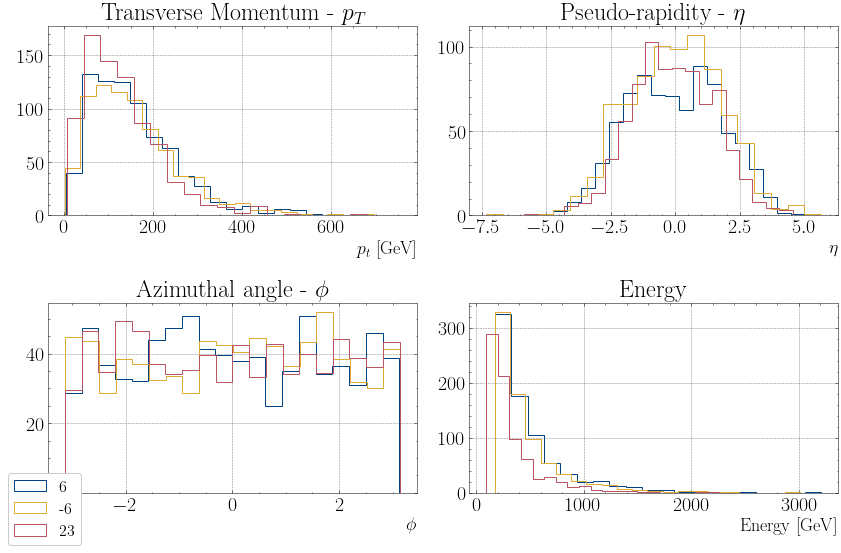

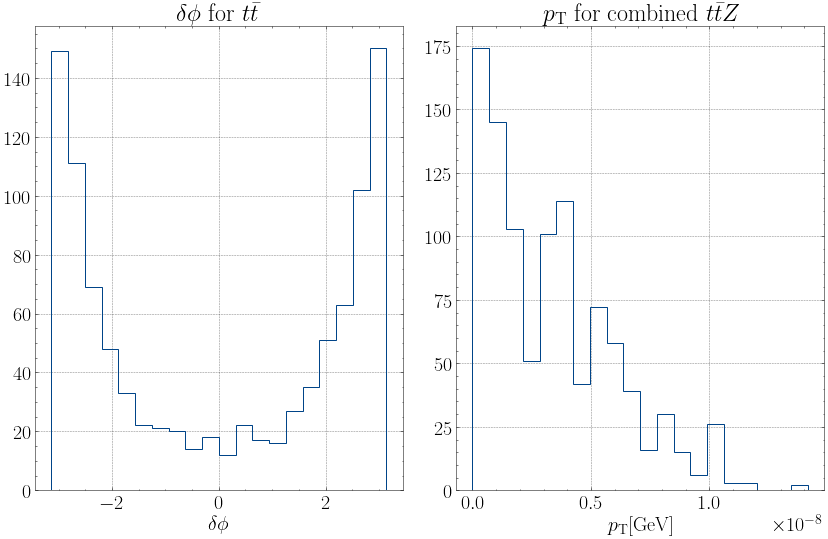

In [38]:
all_pdgids = []
for particle in df['particles'][0]:
    if particle.pdgid not in all_pdgids and not particle.pdgid==21:
        all_pdgids.append(particle.pdgid)
all_weights=[]
for weight in df['weights']:
     all_weights.append(weight['1'])
fig, axes = plt.subplots(2,2)
for param, ax in zip(["pt", "eta", "phi", "e" ], axes.flatten()):
#     pdgids = np.array([6,-6,23])
    pdgids = np.array(all_pdgids)
    for pdgid in pdgids: 
        vals=[]
        for ind, row in df.iterrows():
            for particle in row.particles:
                if particle.pdgid==pdgid:
                    vals.append(getattr(particle, param))
        ax.hist(vals,histtype='step', bins=20, label=f"{pdgid}", 
                weights=all_weights
               )
    if param=='e':
        ax.set_title("Energy")
        ax.set_xlabel('Energy $[$GeV$]$', loc='right', fontsize=18)
    elif param=='pt':
        ax.set_title("Transverse Momentum - $p_T$")
        ax.set_xlabel('$p_t$ $[$GeV$]$', loc='right', fontsize=18)
    elif param =='phi':
        ax.title.set_text("Azimuthal angle - $\phi$")
        ax.set_xlabel('$\phi$', loc='right', fontsize=18)
    elif param =='eta':
        ax.title.set_text("Pseudo-rapidity - $\eta$")
        ax.set_xlabel('$\eta$', loc='right', fontsize=18)
    handles, labels = ax.get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, loc='lower left', fontsize=16, facecolor='white')


fig2, axes2 = plt.subplots(1,2)
axes2[0].hist(df['delta_phi'], histtype='step', bins=20)
axes2[0].title.set_text('$\delta \phi$ for $t \\bar{t}$')
axes2[0].set_xlabel('$\delta \phi$')

axes2[1].hist(df['ptotal'], histtype='step', bins=20)
axes2[1].title.set_text("$p_{\mathrm{T}}$ for combined $t \\bar{t} Z$")
axes2[1].set_xlabel('$p_{\mathrm{T}} [\\text{GeV}]$')
fig2.tight_layout()
plt.show()

In [39]:
# With madspin enabled

In [40]:
df2 = pd.read_hdf('event_files/hdf5/ttZ.h5', 'decayed_limited')
 

In [41]:
df2['delta_phi'] = df2.apply(lambda r: deltaphi_tops(r['particles']), axis=1)
df2['ptotal'] = df2.apply(lambda r: ptot2(r['particles']), axis=1)

[6, 5, 24, -6, -5, -24, 23]


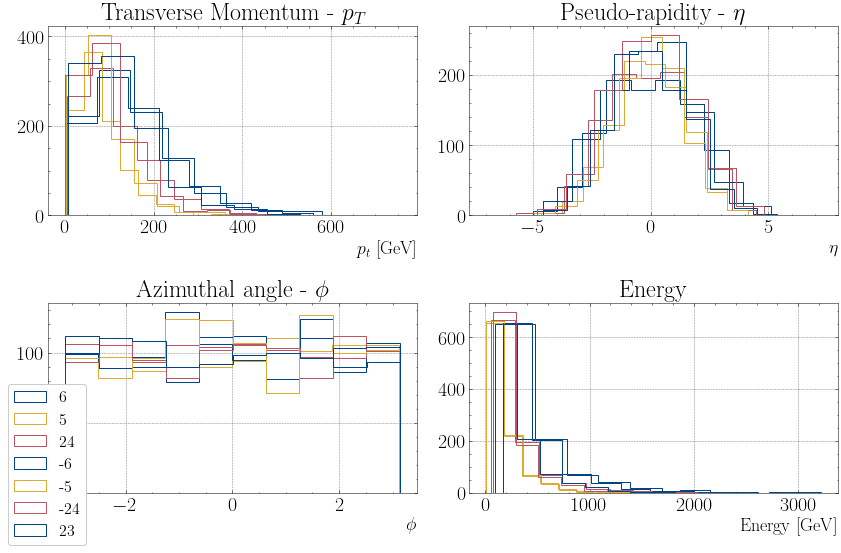

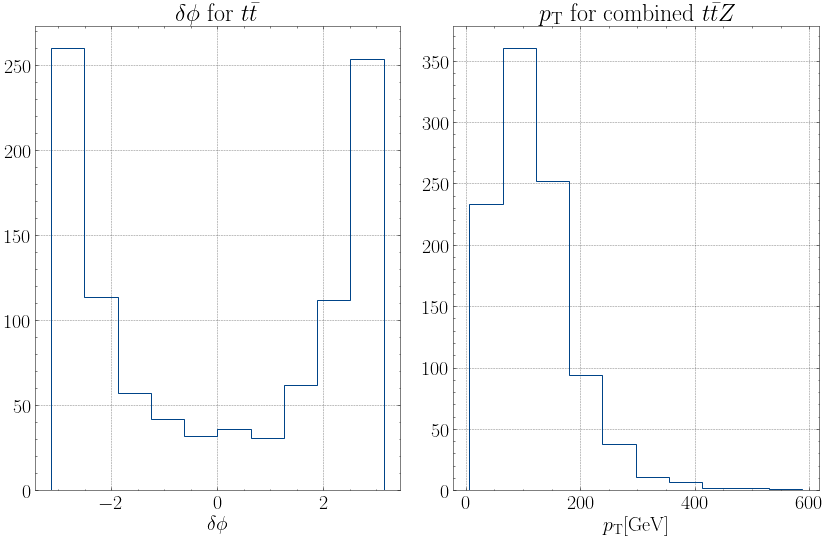

In [42]:
all_pdgids = []
for particle in df2['particles'][0]:
    if particle.pdgid not in all_pdgids and not particle.m==0:
        all_pdgids.append(particle.pdgid)
print(all_pdgids)
fig, axes = plt.subplots(2,2)
for param, ax in zip(["pt", "eta", "phi", "e" ], axes.flatten()):
#     pdgids = np.array([6,-6,23])
    for pdgid in all_pdgids: 
        vals=[]
        for ind, row in df2.iterrows():
            for particle in row.particles:
                if particle.pdgid==pdgid:
                    vals.append(getattr(particle, param))
        ax.hist(vals,histtype='step', bins=10, label=f"{pdgid}")
    if param=='e':
        ax.set_title("Energy")
        ax.set_xlabel('Energy $[$GeV$]$', loc='right', fontsize=18)
    elif param=='pt':
        ax.set_title("Transverse Momentum - $p_T$")
        ax.set_xlabel('$p_t$ $[$GeV$]$', loc='right', fontsize=18)
    elif param =='phi':
        ax.title.set_text("Azimuthal angle - $\phi$")
        ax.set_xlabel('$\phi$', loc='right', fontsize=18)
    elif param =='eta':
        ax.title.set_text("Pseudo-rapidity - $\eta$")
        ax.set_xlabel('$\eta$', loc='right', fontsize=18)
    handles, labels = ax.get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, loc='lower left', fontsize=16, facecolor='white')
    
fig2, axes2 = plt.subplots(1,2)
axes2[0].hist(df2['delta_phi'], histtype='step', bins=10)
axes2[0].title.set_text('$\delta \phi$ for $t \\bar{t}$')
axes2[0].set_xlabel('$\delta \phi$')

axes2[1].hist(df2['ptotal'], histtype='step', bins=10)
axes2[1].title.set_text("$p_{\mathrm{T}}$ for combined $t \\bar{t} Z$")
axes2[1].set_xlabel('$p_{\mathrm{T}} [\\text{GeV}]$')
fig2.tight_layout()
plt.show()

In [ ]:
# playing with weights, will first use the undecayed data


In [3]:
df_weights = pd.read_hdf('event_files/hdf5/ttZ_weighttest.h5', 'weights_limited')

In [12]:
df_weights['weights'][0]['1']

0.75973116

In [20]:
for param, ax in zip(["pt", "eta", "phi", "e" ], axes.flatten()):
#     pdgids = np.array([6,-6,23])
    pdgids = np.array(all_pdgids)
    for pdgid in pdgids: 
        vals=[]
        for ind, row in df.iterrows():
            for particle in row.particles:
                if particle.pdgid==pdgid:
                    vals.append(getattr(particle, param))
        print(df['weights'][1]['1'])

0.78643564
0.78643564
0.78643564
0.78643564
0.78643564
0.78643564
0.78643564
0.78643564
0.78643564
0.78643564
0.78643564
0.78643564
